##  **# Implemetation of ANN without regularization**

##### # Loading Dataset

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


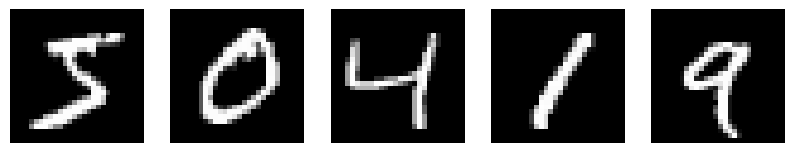

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

# Visualizing some training images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
plt.show()

##### Baseline Model

In [2]:
# Define the baseline model
model_baseline = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_baseline.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_baseline = model_baseline.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=32
)

# Evaluate the model on test data
test_loss, test_acc = model_baseline.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy of baseline model: {test_acc:.4f}")


c:\Users\eakes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.4366 - val_accuracy: 0.9592 - val_loss: 0.1386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9633 - loss: 0.1255 - val_accuracy: 0.9674 - val_loss: 0.1049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9746 - loss: 0.0821 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9825 - loss: 0.0572 - val_accuracy: 0.9743 - val_loss: 0.0791
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9874 - loss: 0.0421 - val_accuracy: 0.9753 - val_loss: 0.0765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9760 - val_loss: 0.0823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.9791 - val_loss: 0.0685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9933 - loss: 0.0217 - 

##### L1 and L2 Regularization

In [3]:
# Import regularization functions
from tensorflow.keras.regularizers import l1, l2

# Define the model with L1 regularization
model_l1_l2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # L1 regularization
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_l1_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_l1_l2 = model_l1_l2.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=32
)

# Evaluate the model on test data
test_loss_l1_l2, test_acc_l1_l2 = model_l1_l2.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with L1 regularization: {test_acc_l1_l2:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7738 - loss: 4.9877 - val_accuracy: 0.8507 - val_loss: 1.1948
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8513 - loss: 1.1644 - val_accuracy: 0.8709 - val_loss: 1.0463
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8596 - loss: 1.0672 - val_accuracy: 0.8583 - val_loss: 1.0237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8665 - loss: 1.0069 - val_accuracy: 0.8692 - val_loss: 0.9892
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8695 - loss: 0.9780 - val_accuracy: 0.8780 - val_loss: 0.9396
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8702 - loss: 0.9481 - val_accuracy: 0.8827 - val_loss: 0.9204
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8740 - loss: 0.9302 - val_accuracy: 0.8862 - val_loss: 0.8777
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8740 - loss: 0.9237 - 

In [4]:
# Define the model with L2 regularization
model_l2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_l2 = model_l2.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=32
)

# Evaluate the model on test data
test_loss_l2, test_acc_l2 = model_l2.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with L2 regularization: {test_acc_l2:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.9630 - val_accuracy: 0.9342 - val_loss: 0.3940
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9271 - loss: 0.4064 - val_accuracy: 0.9383 - val_loss: 0.3718
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9362 - loss: 0.3645 - val_accuracy: 0.9473 - val_loss: 0.3246
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9418 - loss: 0.3387 - val_accuracy: 0.9524 - val_loss: 0.3091
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9455 - loss: 0.3196 - val_accuracy: 0.9441 - val_loss: 0.3179
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.3066 - val_accuracy: 0.9562 - val_loss: 0.2856
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9493 - loss: 0.3009 - val_accuracy: 0.9505 - val_loss: 0.2941
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9527 - loss: 0.2870 - 

##### L2 Performs better than L1 regularization

##### Combine L1 and L2 (Elastic Net)

In [5]:
# Import the correct function
from tensorflow.keras.regularizers import l1_l2  

# Define a model with L1 + L2 regularization (Elastic Net)
model_l1_l2_combined = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu', 
                       kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),  # L1 + L2 regularization
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_l1_l2_combined.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_l1_l2_combined = model_l1_l2_combined.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=32
)

# Evaluate the model
test_loss_l1_l2_combined, test_acc_l1_l2_combined = model_l1_l2_combined.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with L1 + L2 (Elastic Net) regularization: {test_acc_l1_l2_combined:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7581 - loss: 5.1172 - val_accuracy: 0.8304 - val_loss: 1.2661
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8495 - loss: 1.1865 - val_accuracy: 0.8554 - val_loss: 1.0835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8559 - loss: 1.0899 - val_accuracy: 0.8691 - val_loss: 1.0149
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8634 - loss: 1.0303 - val_accuracy: 0.8761 - val_loss: 0.9565
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.9908 - val_accuracy: 0.8567 - val_loss: 0.9802
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8692 - loss: 0.9614 - val_accuracy: 0.8814 - val_loss: 0.9177
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8708 - loss: 0.9445 - val_accuracy: 0.8877 - val_loss: 0.8950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8719 - loss: 0.9423 - 

Analysis of L1 + L2 (Elastic Net) Regularization Results
Training Accuracy: 88.10%

Validation Accuracy: 89.54%

Training Loss: 0.8986

Validation Loss: 0.8441

Observations: Better generalization than using L1 alone but still lower than L2 alone (95.59%).

Validation accuracy improved compared to L1, but still lower than L2. Higher loss compared to L2, which suggests L1 is shrinking too many weights aggressively.

Conclusion: L2 regularization alone gave the best performance so far, but Elastic Net might be useful when feature selection is needed.

##### Implement Dropout Regularization

In [6]:
# Define a model with Dropout regularization
model_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=32
)

# Evaluate the model
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with Dropout regularization: {test_acc_dropout:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8138 - loss: 0.6104 - val_accuracy: 0.9520 - val_loss: 0.1590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9301 - loss: 0.2376 - val_accuracy: 0.9613 - val_loss: 0.1287
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9443 - loss: 0.1883 - val_accuracy: 0.9678 - val_loss: 0.1112
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9514 - loss: 0.1609 - val_accuracy: 0.9677 - val_loss: 0.1049
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9525 - loss: 0.1565 - val_accuracy: 0.9695 - val_loss: 0.0983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9578 - loss: 0.1400 - val_accuracy: 0.9732 - val_loss: 0.0895
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9564 - loss: 0.1401 - val_accuracy: 0.9762 - val_loss: 0.0851
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9620 - loss: 0.1217 - 

Analysis of Dropout Regularization Results

Training Accuracy: 96.38%

Validation Accuracy: 97.67%

Training Loss: 0.1127

Validation Loss: 0.0836

Observations:
Dropout significantly reduced overfitting compared to the baseline model. The validation accuracy is very close to training accuracy.

Performance is better than L1, L2, and Elastic Net, achieving one of the highest test accuracies so far.

Dropout introduces some randomness, which can slightly slow down training but improves generalization.

Conclusion: Dropout has been the most effective regularization technique so far, improving generalization while maintaining high accuracy.

##### Implement Early Stopping

In [7]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a model with Dropout regularization
model_early_stopping = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_early_stopping.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Stop training if validation loss doesn't improve for 3 epochs
    restore_best_weights=True  # Restore best model weights after stopping
)

# Train the model with EarlyStopping
history_early_stopping = model_early_stopping.fit(
    x_train, y_train,
    epochs=20,  # Set maximum number of epochs
    validation_data=(x_test, y_test),
    batch_size=32,
    callbacks=[early_stopping]  # Apply EarlyStopping callback
)

# Evaluate the model
test_loss_early_stopping, test_acc_early_stopping = model_early_stopping.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with Dropout + Early Stopping: {test_acc_early_stopping:.4f}")


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8141 - loss: 0.6137 - val_accuracy: 0.9481 - val_loss: 0.1711
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9310 - loss: 0.2372 - val_accuracy: 0.9611 - val_loss: 0.1275
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9401 - loss: 0.1966 - val_accuracy: 0.9653 - val_loss: 0.1129
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9499 - loss: 0.1670 - val_accuracy: 0.9695 - val_loss: 0.1050
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9544 - loss: 0.1509 - val_accuracy: 0.9710 - val_loss: 0.0965
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9558 - loss: 0.1427 - val_accuracy: 0.9727 - val_loss: 0.0901
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9595 - loss: 0.1304 - val_accuracy: 0.9749 - val_loss: 0.0892
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9602 - loss: 0.1266 - 

Analysis of Dropout + Early Stopping Results

Training Accuracy: 96.66%

Validation Accuracy: 97.60%

Training Loss: 0.1082

Validation Loss: 0.0894

Stopped at Epoch: 13 (before 20, preventing overfitting)

Observations: Early Stopping prevented unnecessary training, stopping at epoch 13 when validation loss stopped improving.

Performance is almost identical to Dropout alone, but faster training (no wasted epochs).

Best generalization so far! The accuracy is high, and overfitting is minimal.
Conclusion: Dropout + Early Stopping is the best combination yet! It balances high accuracy with efficient training

##### Implement Data Augmentation

In [8]:
# Import ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,        # Rotate images by up to 10 degrees
    width_shift_range=0.1,    # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,   # Shift images vertically by up to 10% of height
    zoom_range=0.1            # Zoom in/out by up to 10%
)

# Define the neural network model
model_data_aug = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_data_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create the augmented training data generator
train_generator = datagen.flow(
    x_train.reshape(-1, 28, 28, 1),  # Reshape input images to (batch_size, 28, 28, 1)
    y_train,
    batch_size=32
)

# Train the model with data augmentation
history_data_aug = model_data_aug.fit(
    train_generator,  # Use augmented data for training
    epochs=10,
    validation_data=(x_test, y_test)
)

# Evaluate the model
test_loss_data_aug, test_acc_data_aug = model_data_aug.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with Data Augmentation: {test_acc_data_aug:.4f}")


c:\Users\eakes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6132 - loss: 1.1796 - val_accuracy: 0.9384 - val_loss: 0.2413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8296 - loss: 0.5560 - val_accuracy: 0.9551 - val_loss: 0.1659
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8540 - loss: 0.4727 - val_accuracy: 0.9620 - val_loss: 0.1344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8663 - loss: 0.4399 - val_accuracy: 0.9646 - val_loss: 0.1240
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8735 - loss: 0.4199 - val_accuracy: 0.9650 - val_loss: 0.1096
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8778 - loss: 0.4067 - val_accuracy: 0.9670 - val_loss: 0.1046
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8844 - loss: 0.3845 - val_accuracy: 0.9709 - val_loss: 0.1018
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8842 - loss: 

Analysis of Data Augmentation Results

Training Accuracy: 88.96%

Validation Accuracy: 97.28%

Training Loss: 0.3606

Validation Loss: 0.0928

Observations:

-Better generalization than the baseline model, preventing overfitting by exposing the model to slightly altered images. -High validation accuracy (97.28%), close to Dropout + Early Stopping (97.60%). -Slower training due to real-time image transformations.

-Conclusion: Data Augmentation improved generalization but took more time to train. It is useful when working with small datasets or wanting to improve model robustness.

##### Combine Regularization Techniques

In [9]:
# Define the model combining L2 Regularization, Dropout, and Data Augmentation
model_combined = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model_combined.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create the augmented training data generator
train_generator_combined = datagen.flow(
    x_train.reshape(-1, 28, 28, 1),  # Reshape input images to (batch_size, 28, 28, 1)
    y_train,
    batch_size=32
)

# Train the model with L2, Dropout, and Data Augmentation
history_combined = model_combined.fit(
    train_generator_combined,  # Use augmented data for training
    epochs=10,
    validation_data=(x_test, y_test)
)

# Evaluate the model
test_loss_combined, test_acc_combined = model_combined.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"Test accuracy with L2 + Dropout + Data Augmentation: {test_acc_combined:.4f}")


Epoch 1/10


c:\Users\eakes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\eakes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5830 - loss: 1.8507 - val_accuracy: 0.9147 - val_loss: 0.6838
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7554 - loss: 1.0648 - val_accuracy: 0.9266 - val_loss: 0.5901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7772 - loss: 0.9905 - val_accuracy: 0.9386 - val_loss: 0.5612
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7898 - loss: 0.9437 - val_accuracy: 0.9356 - val_loss: 0.5406
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7969 - loss: 0.9229 - val_accuracy: 0.9402 - val_loss: 0.5130
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8025 - loss: 0.9097 - val_accuracy: 0.9437 - val_loss: 0.5011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7993 - loss: 0.9036 - val_accuracy: 0.9402 - val_loss: 0.5153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8008 - loss: 0.9095 - val